# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

# set up of example
sim_no = 1
n_train = 1000
snr = 10
groundtruth_effect = "empirical"

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,2.007301,0.254855,1.994282e-03,2.484539e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,2.113571,0.468118,1.349524e-03,3.569207e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.030408,0.007777,7.548377e-04,2.988993e-05
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.014924,0.005960,2.608712e-08,2.608712e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.004364,0.010913,2.119711e-03,4.156240e-03
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2comb-cor_20_1000_5,XGBoost-2comb-cor,20,1000,5.0,mean_squared_error,0.275586,0.359180,1.527465e-02,1.120560e-03
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.535199,0.586872,1.790406e-02,2.309252e-03
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.006248,0.010141,3.025214e-03,4.169999e-04
198,0,GAM-2comb-cor_20_1000_5,GAM-2comb-cor,20,1000,5.0,mean_squared_error,0.006215,0.007904,3.338958e-04,3.338958e-04


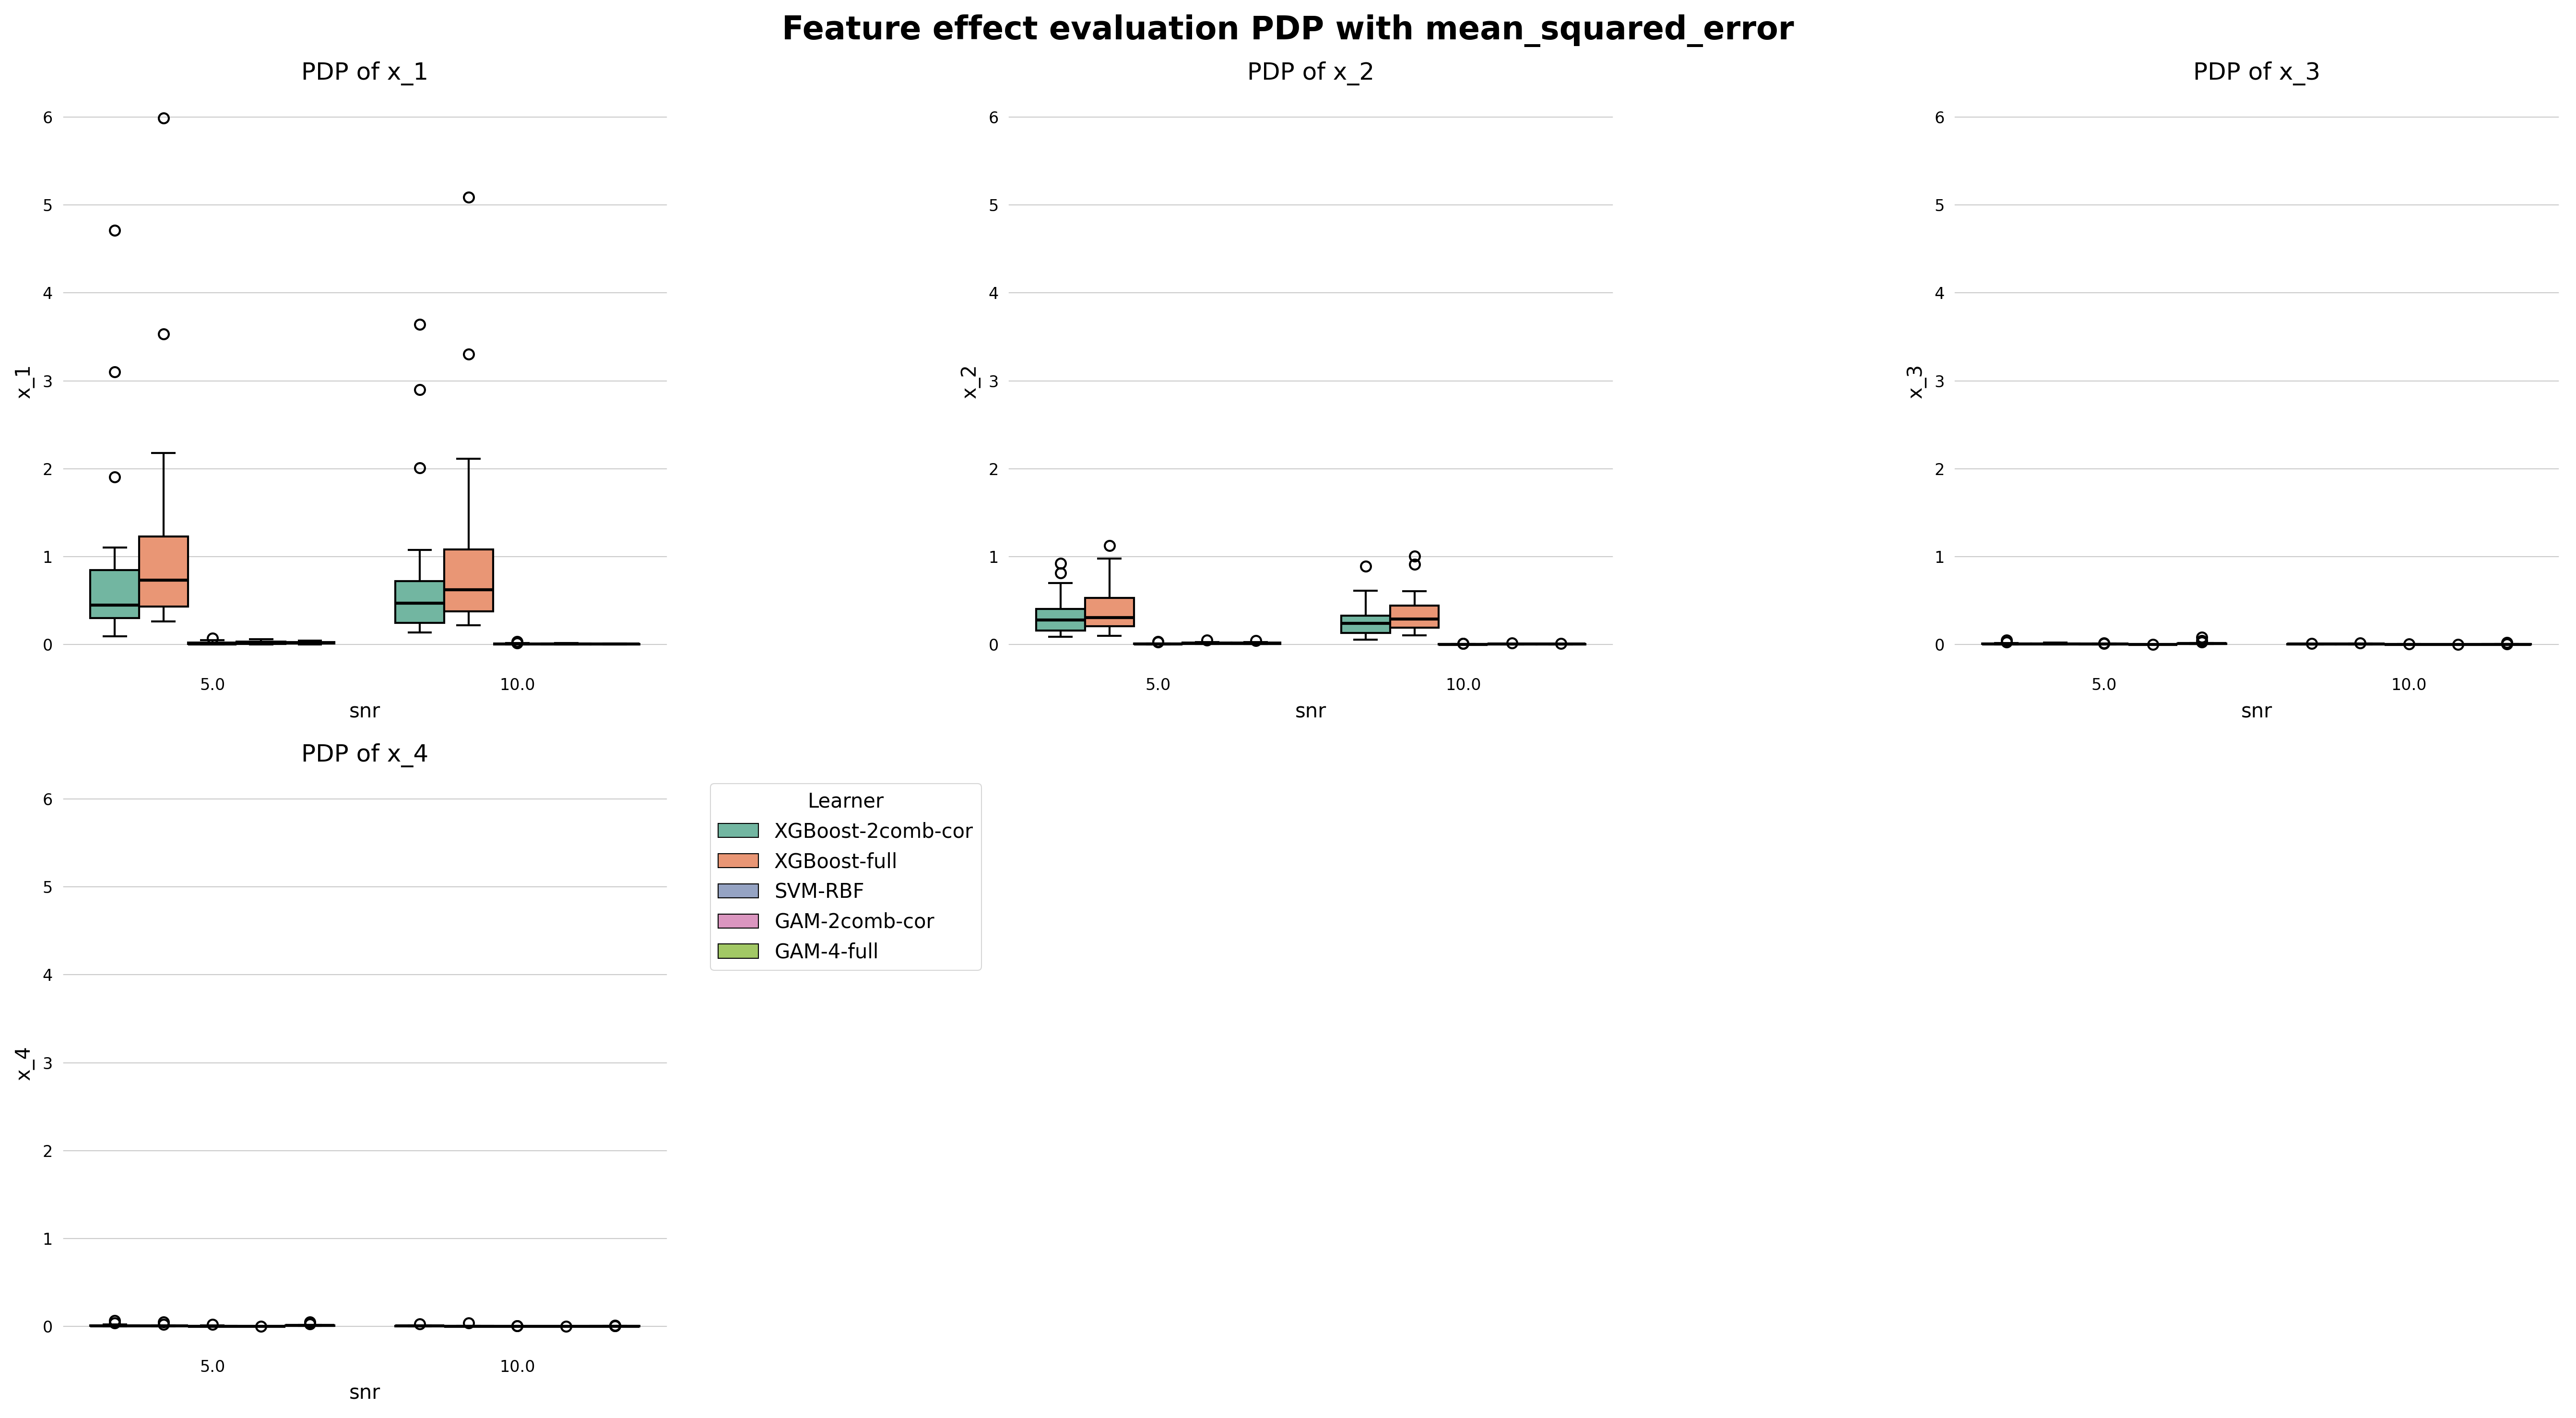

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10)

In [8]:
# init groundtruth
groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, n_train, 1000, snr, seed=1)
# load models
gam_cor = load(f'../models/GAM-2comb-cor_{sim_no}_{n_train}_{snr}.joblib')
gam_full = load(f'../models/GAM-4-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_full = load(f'../models/XGBoost-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_cor = load(f'../models/XGBoost-2comb-cor_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVM-RBF_{sim_no}_{n_train}_{snr}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


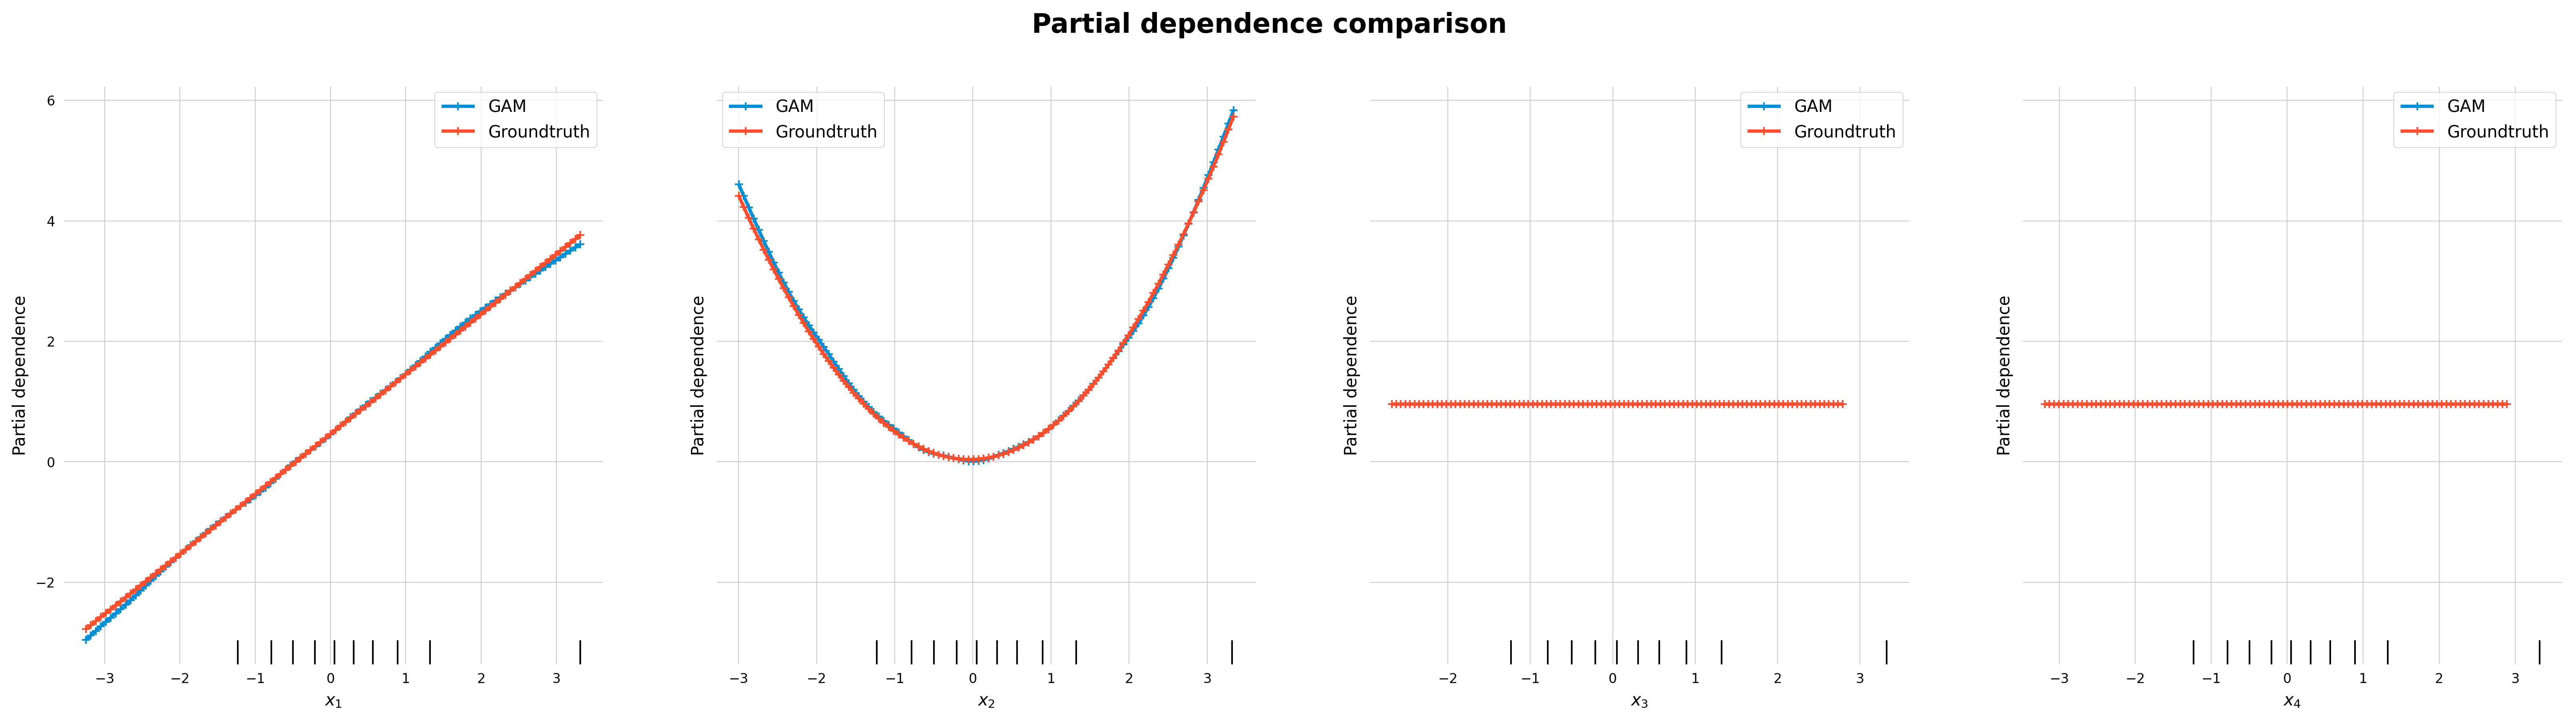

In [9]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

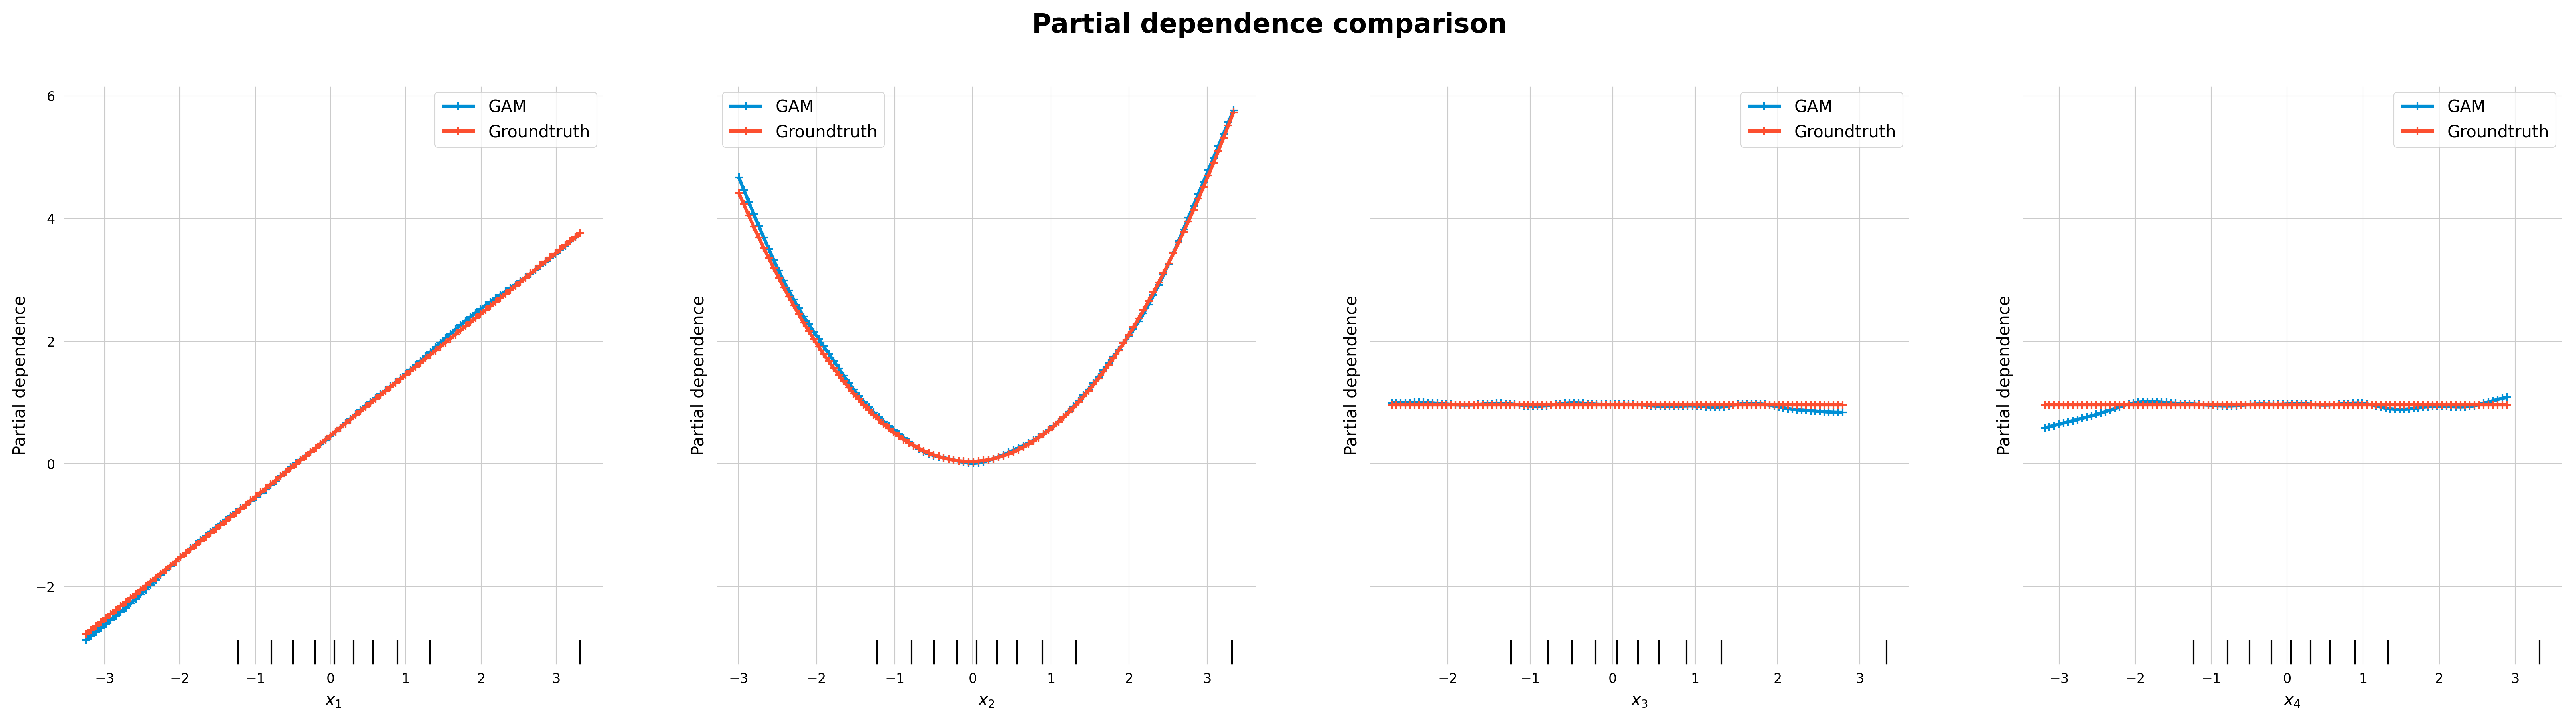

In [10]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

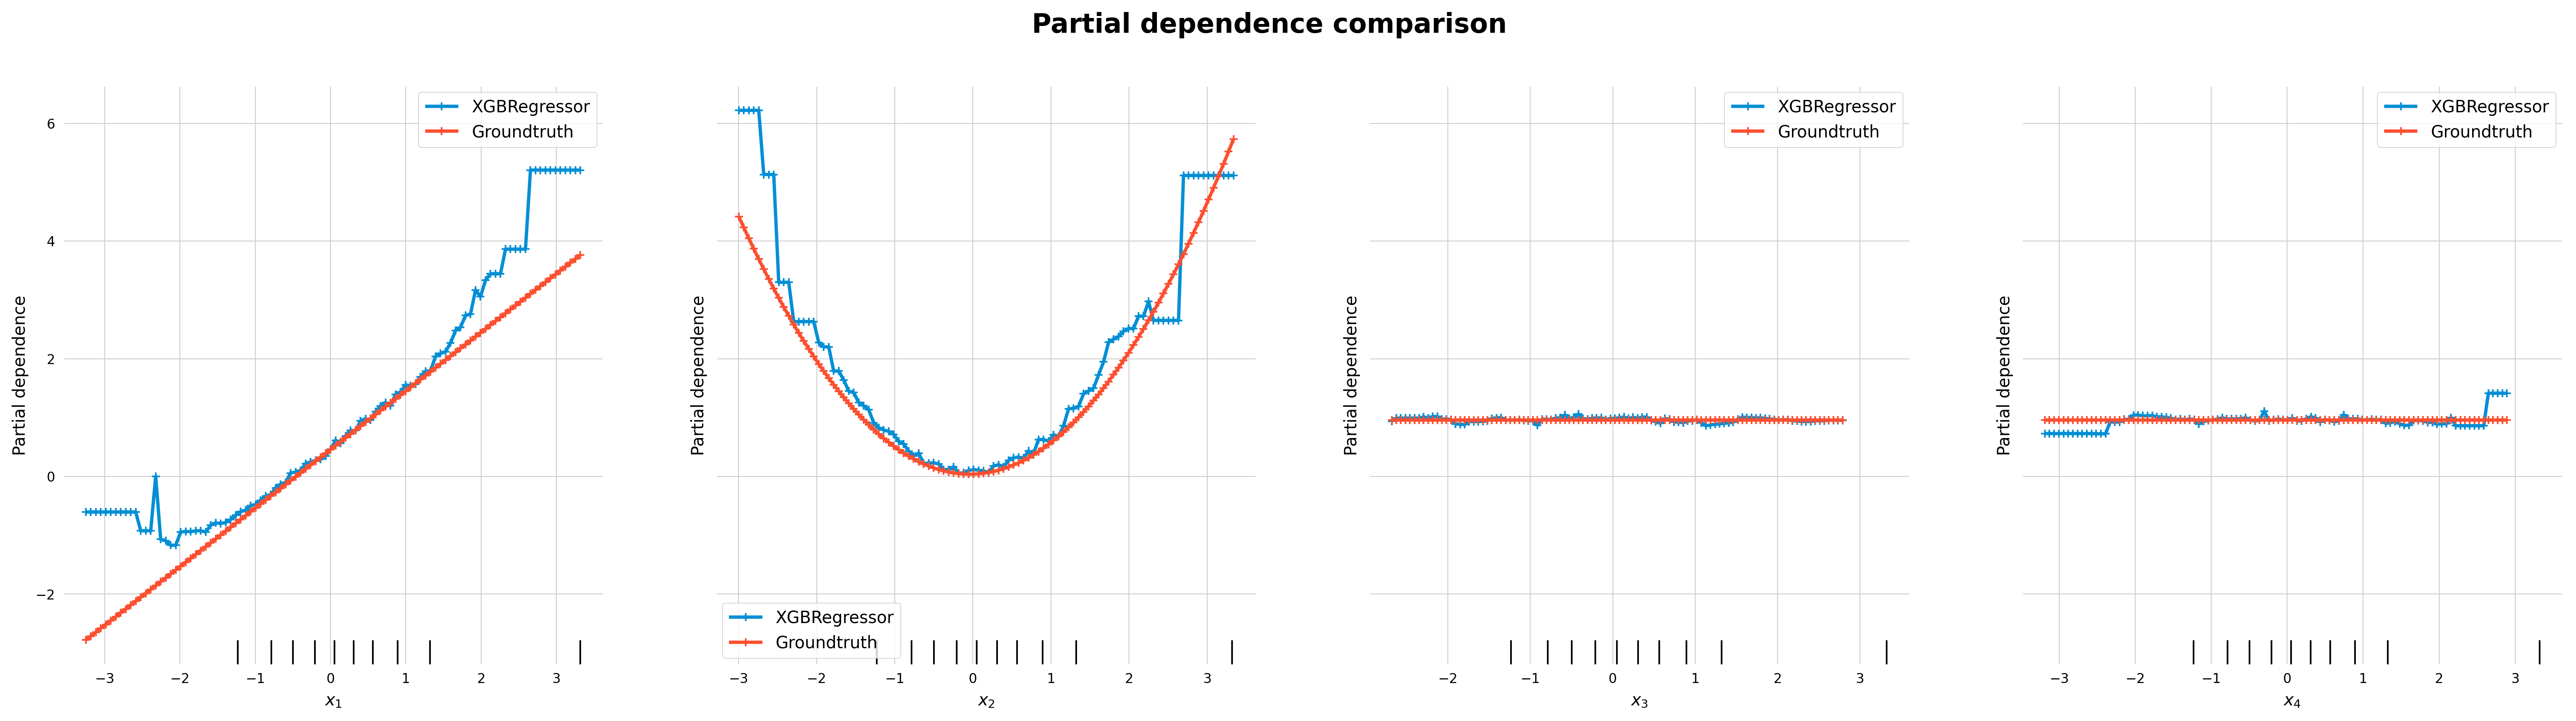

In [11]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

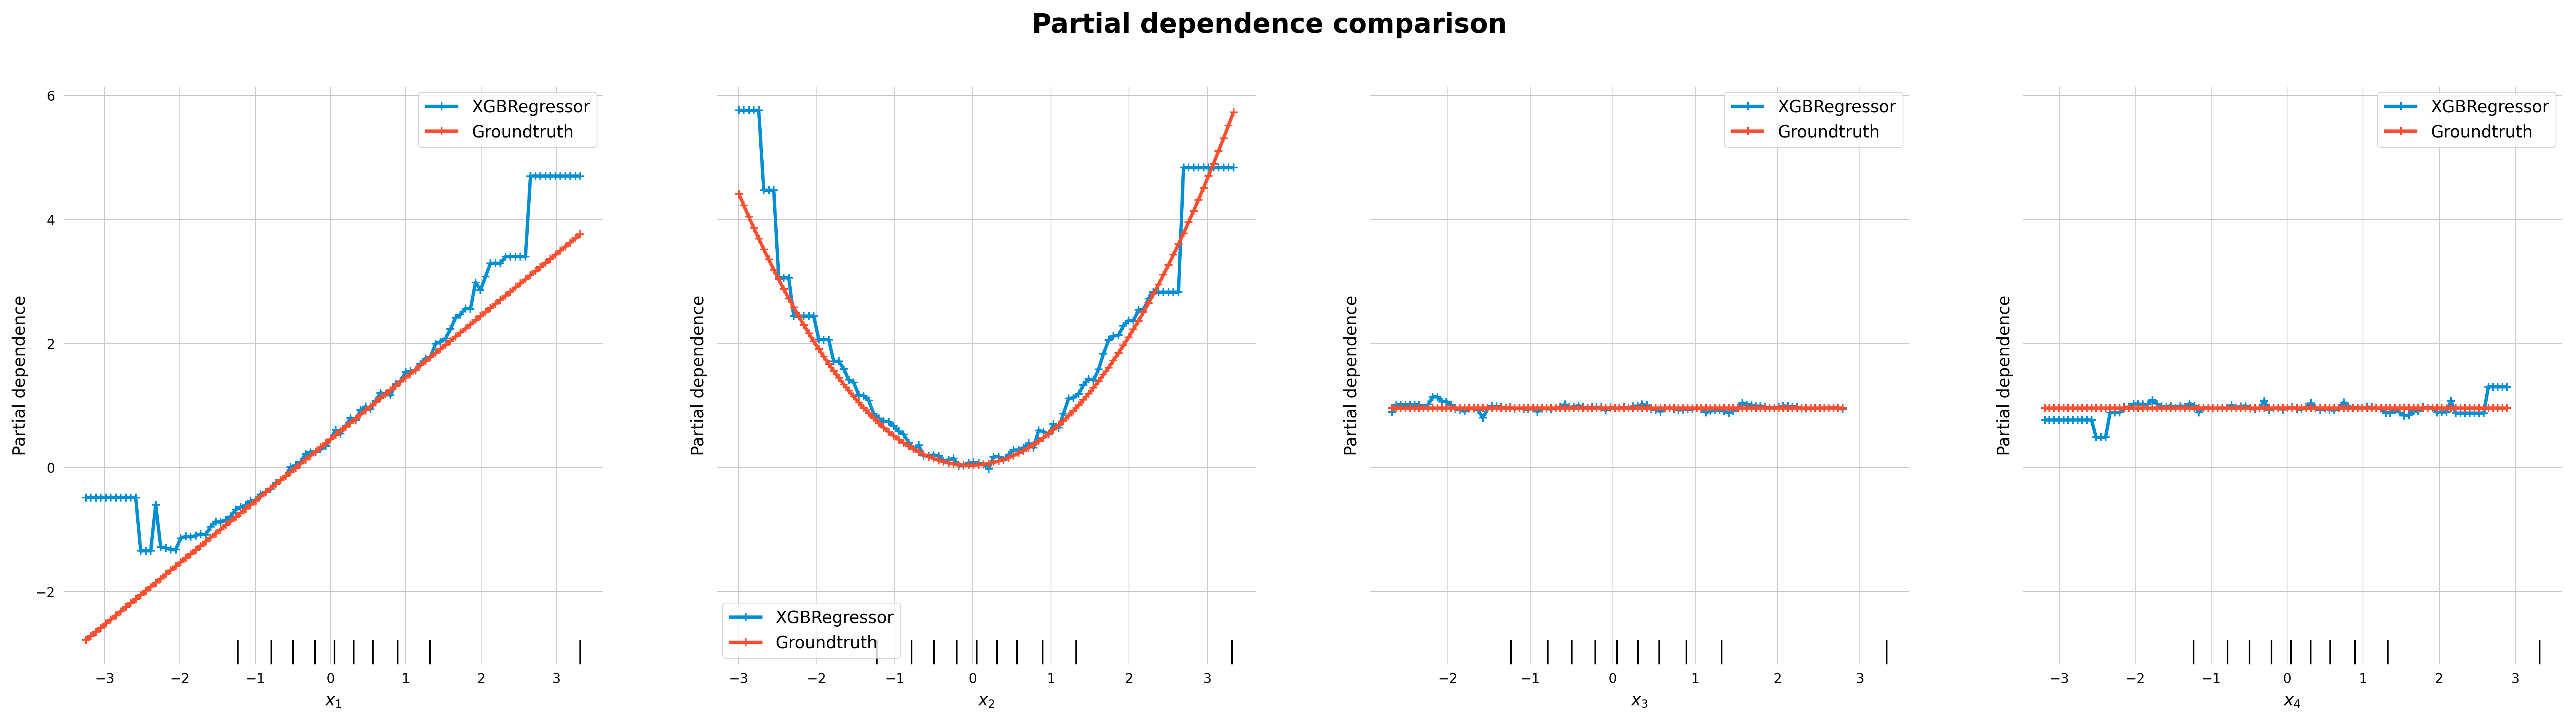

In [12]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

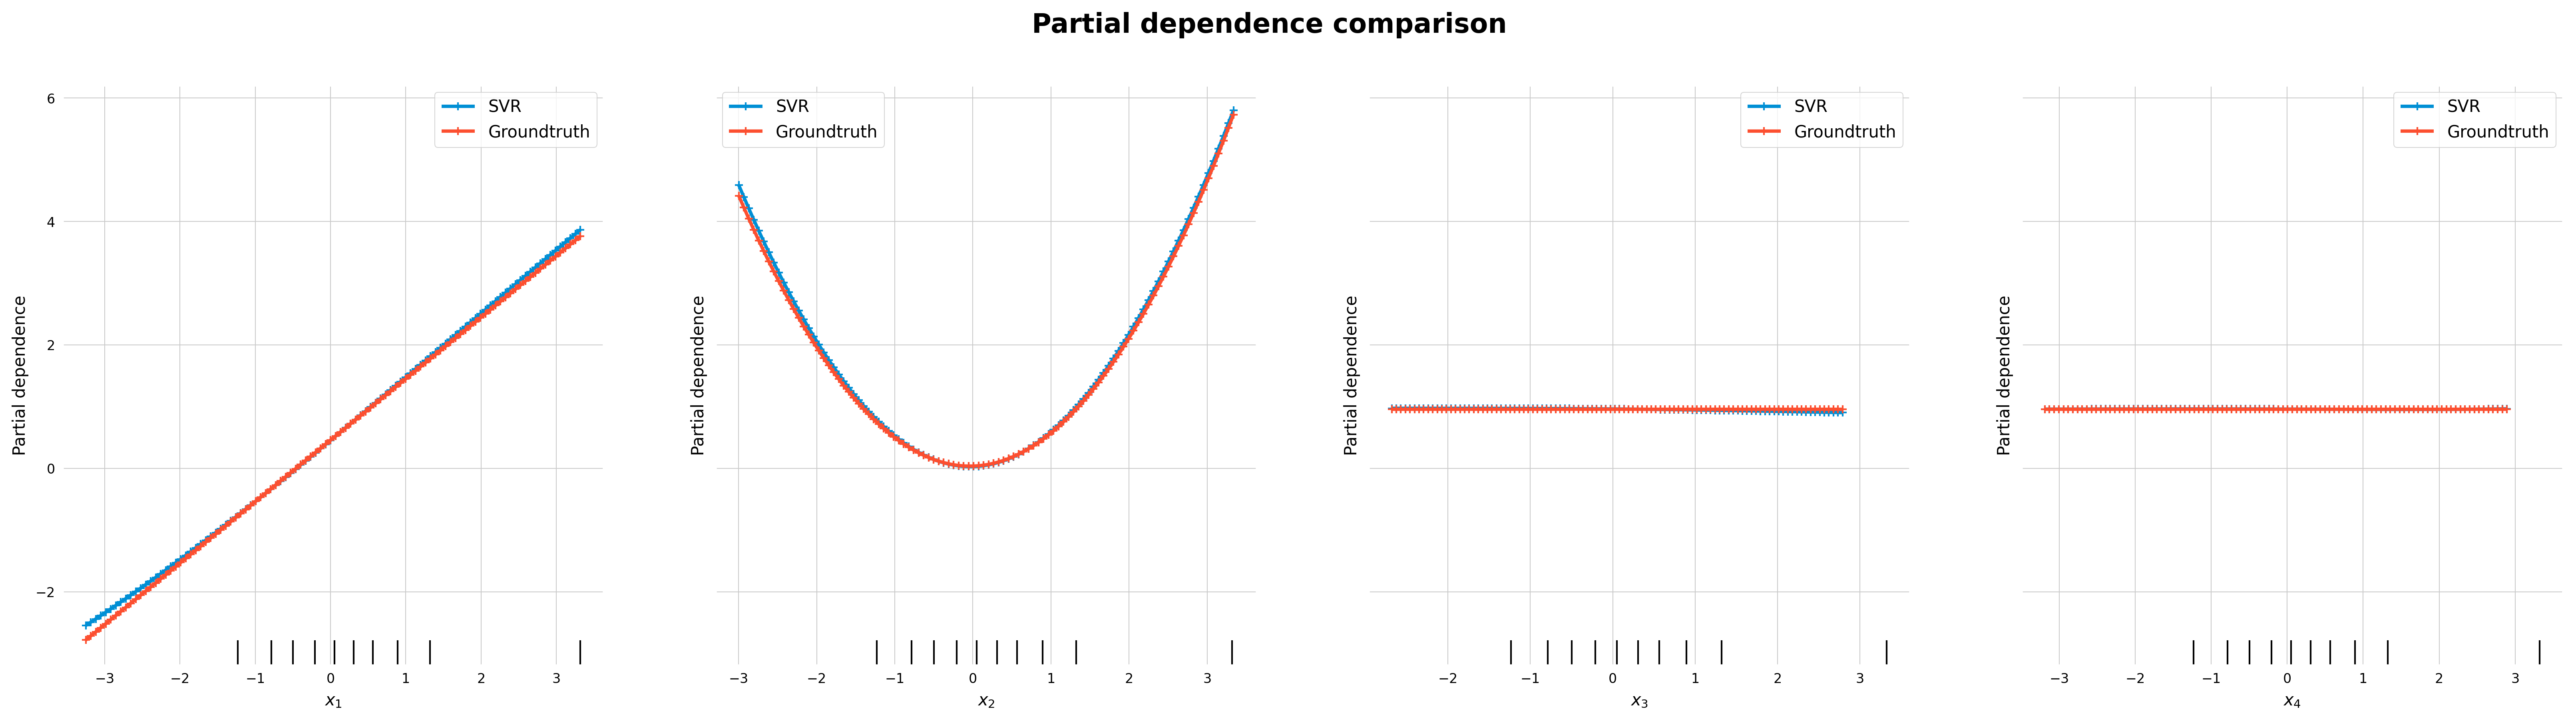

In [13]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [14]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.022243,0.097029,0.002220,0.003219
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.029336,0.105663,0.004211,0.003556
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000925,0.000568,0.000184,0.000016
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.000982,0.000641,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000340,0.000553,0.000593,0.001009
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2comb-cor_20_1000_5,XGBoost-2comb-cor,20,1000,5.0,mean_squared_error,0.021085,0.086549,0.003545,0.000484
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.025712,0.123681,0.006930,0.002549
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.000881,0.002575,0.000855,0.000075
198,0,GAM-2comb-cor_20_1000_5,GAM-2comb-cor,20,1000,5.0,mean_squared_error,0.000787,0.002293,0.000000,0.000000


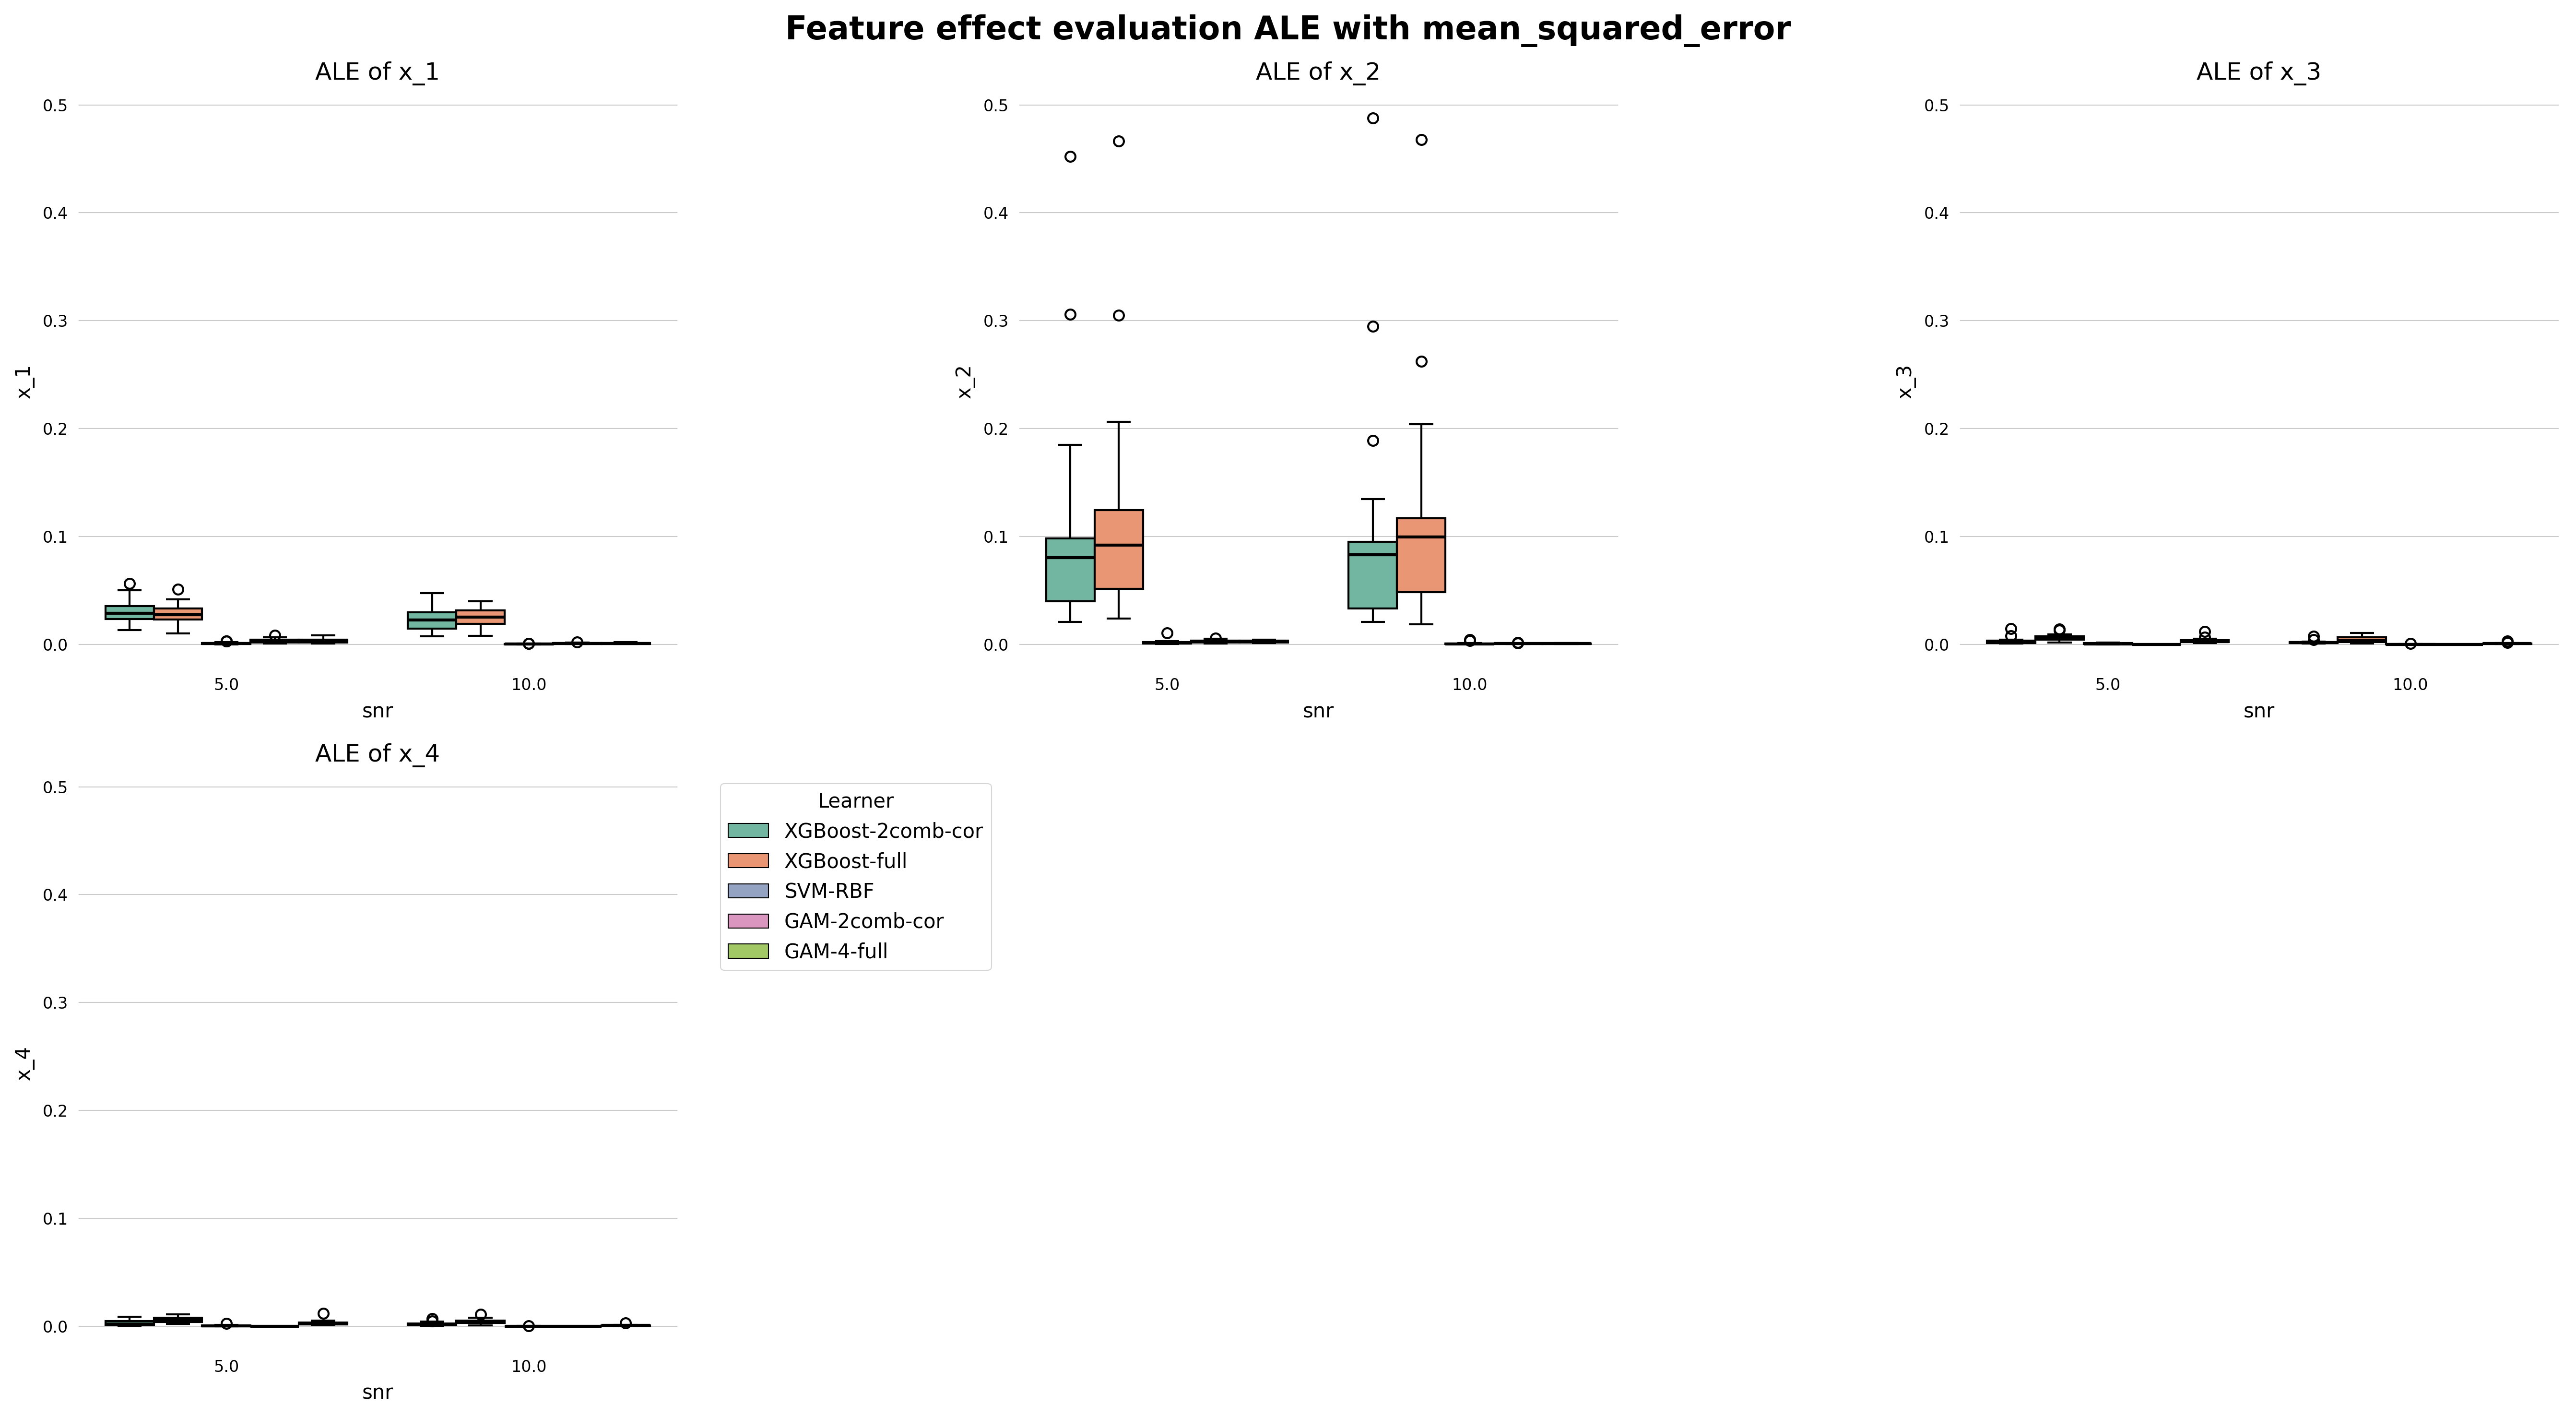

In [15]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="ALE");

### ALE example visualizations

In [16]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10)

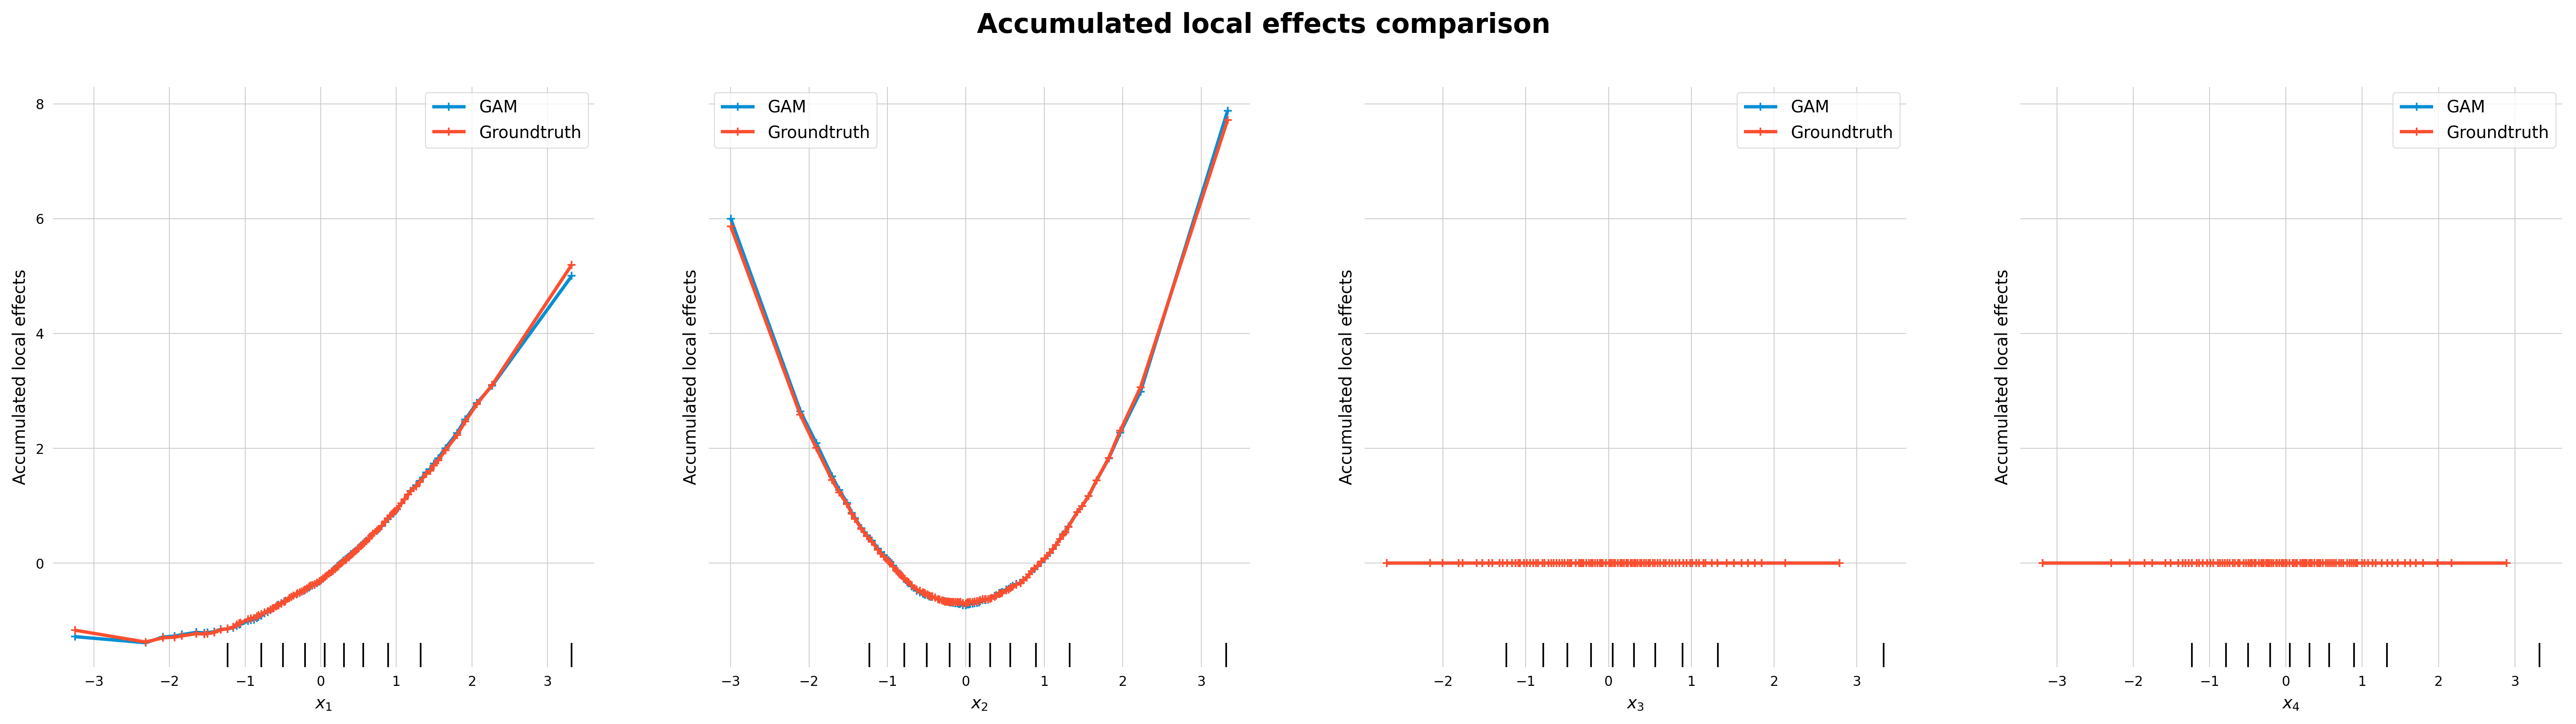

In [17]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

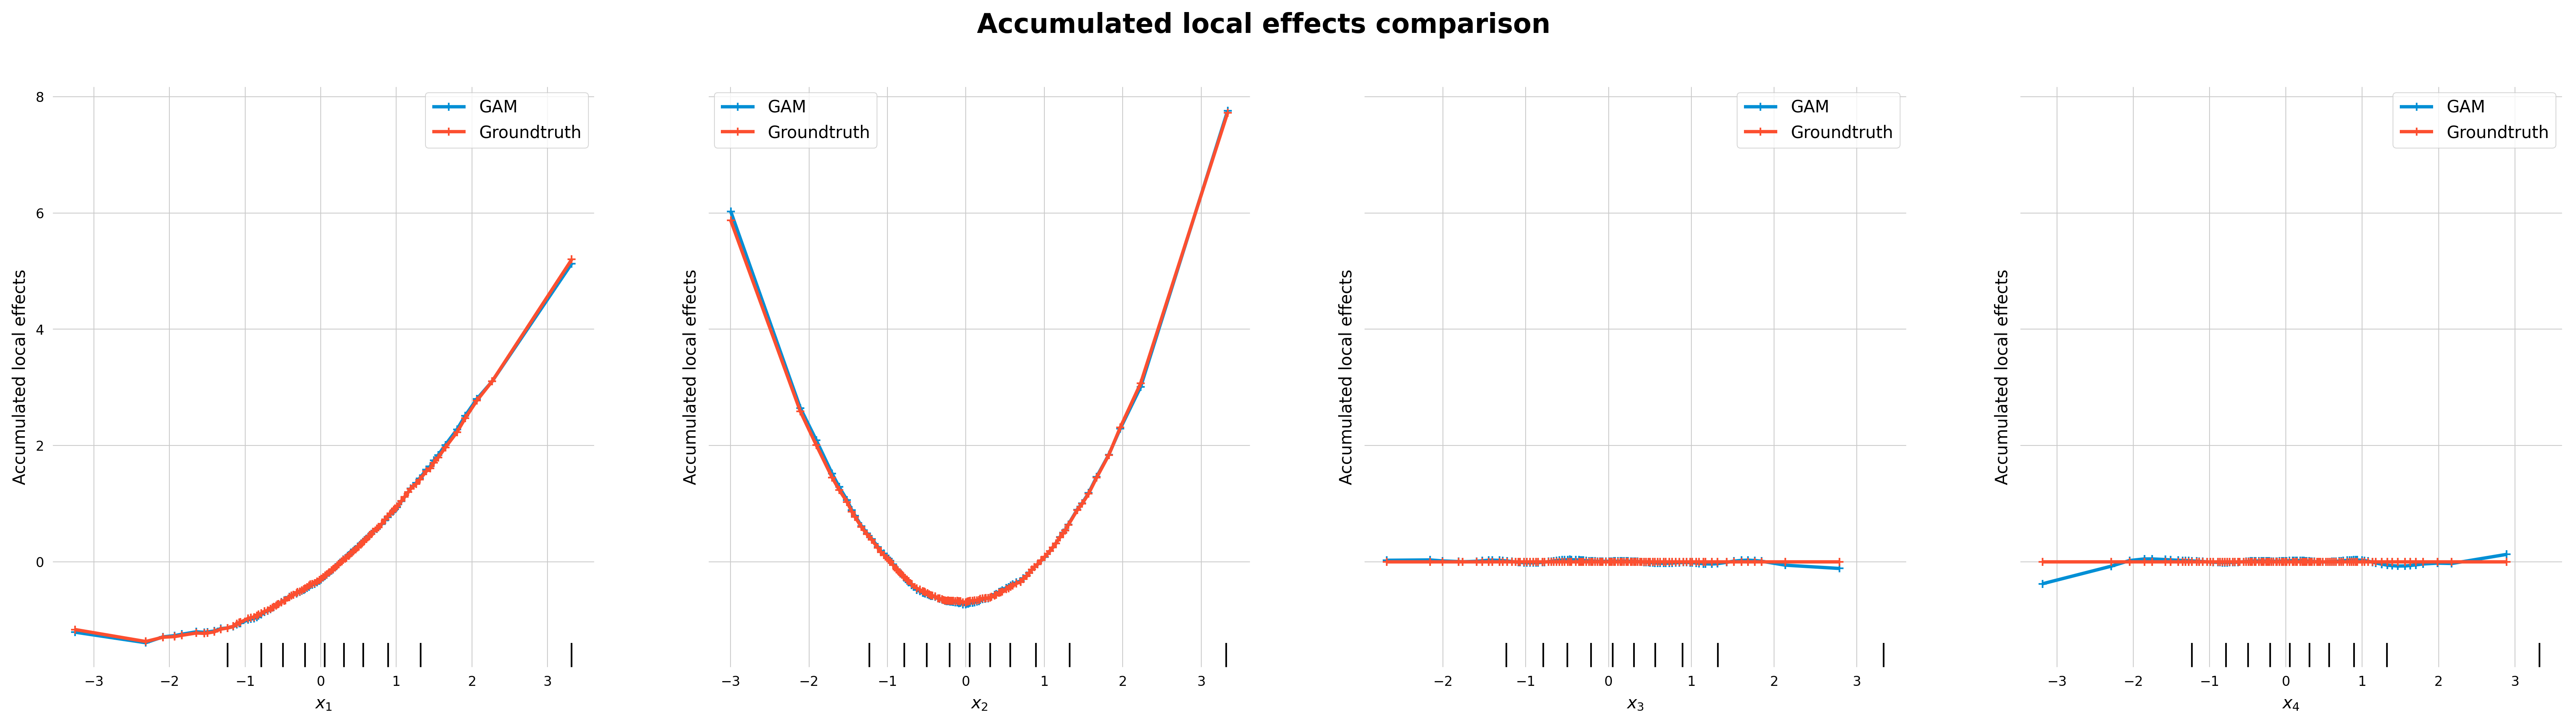

In [18]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

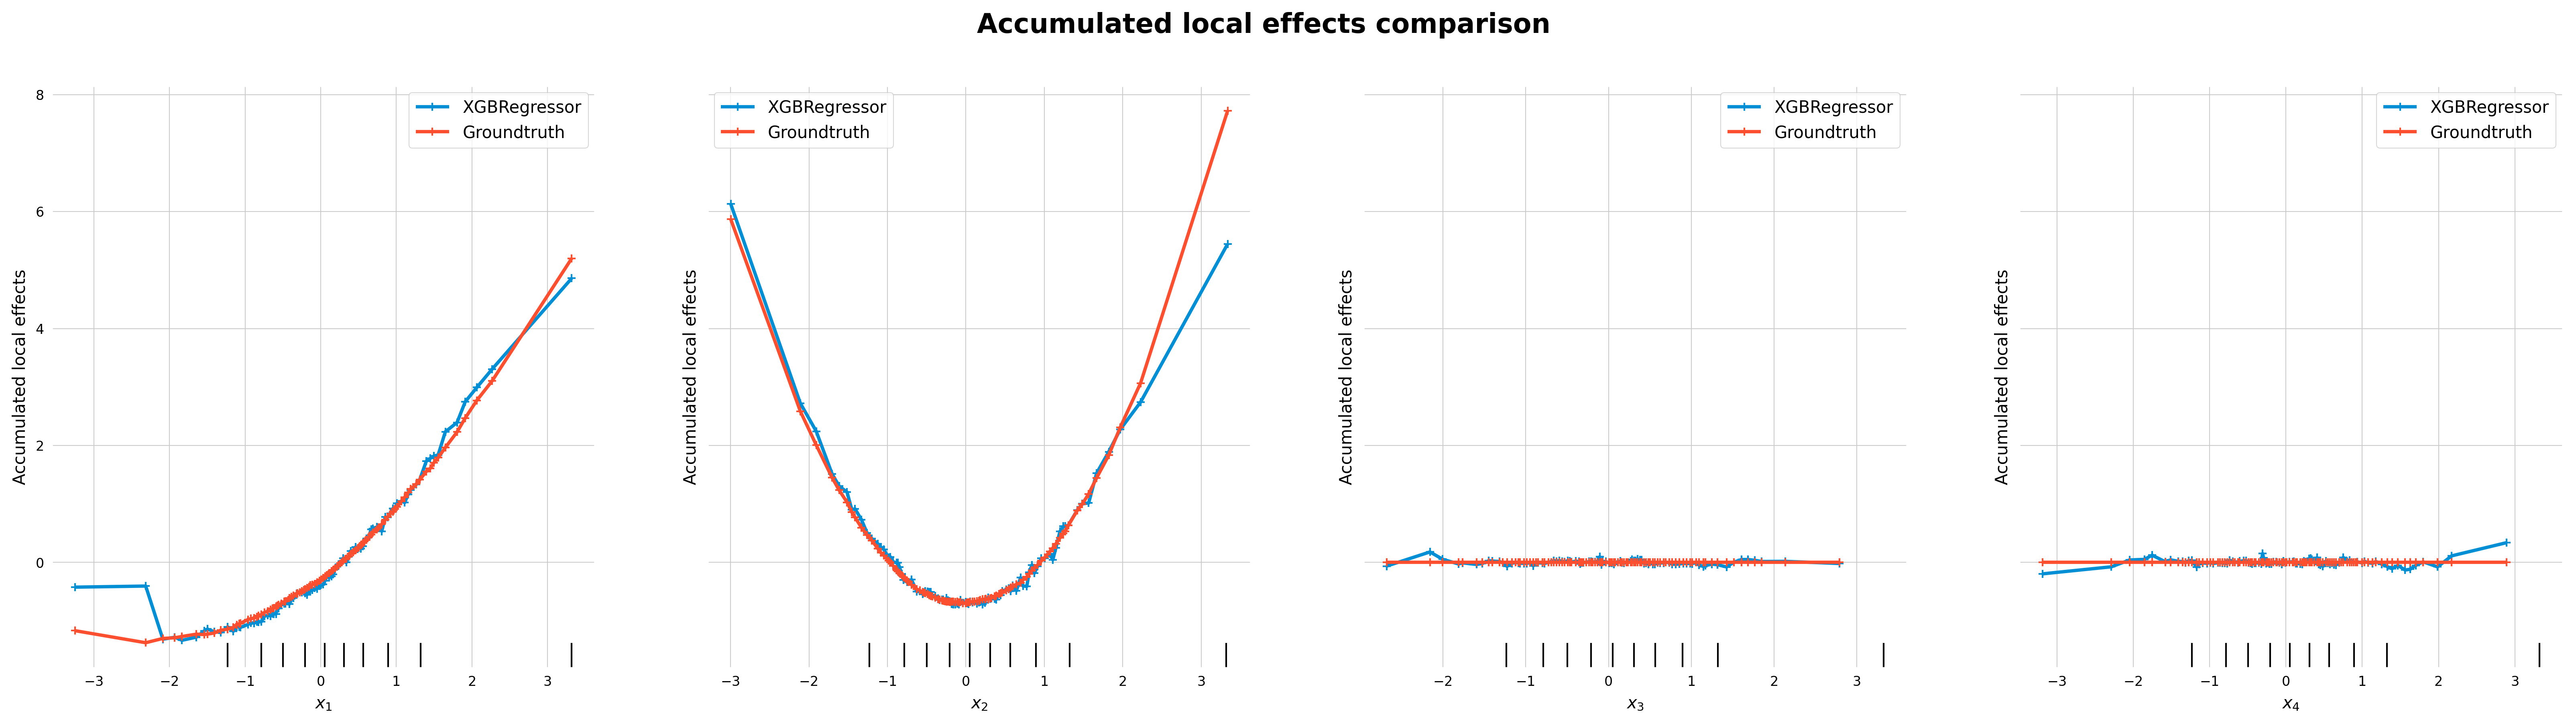

In [19]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

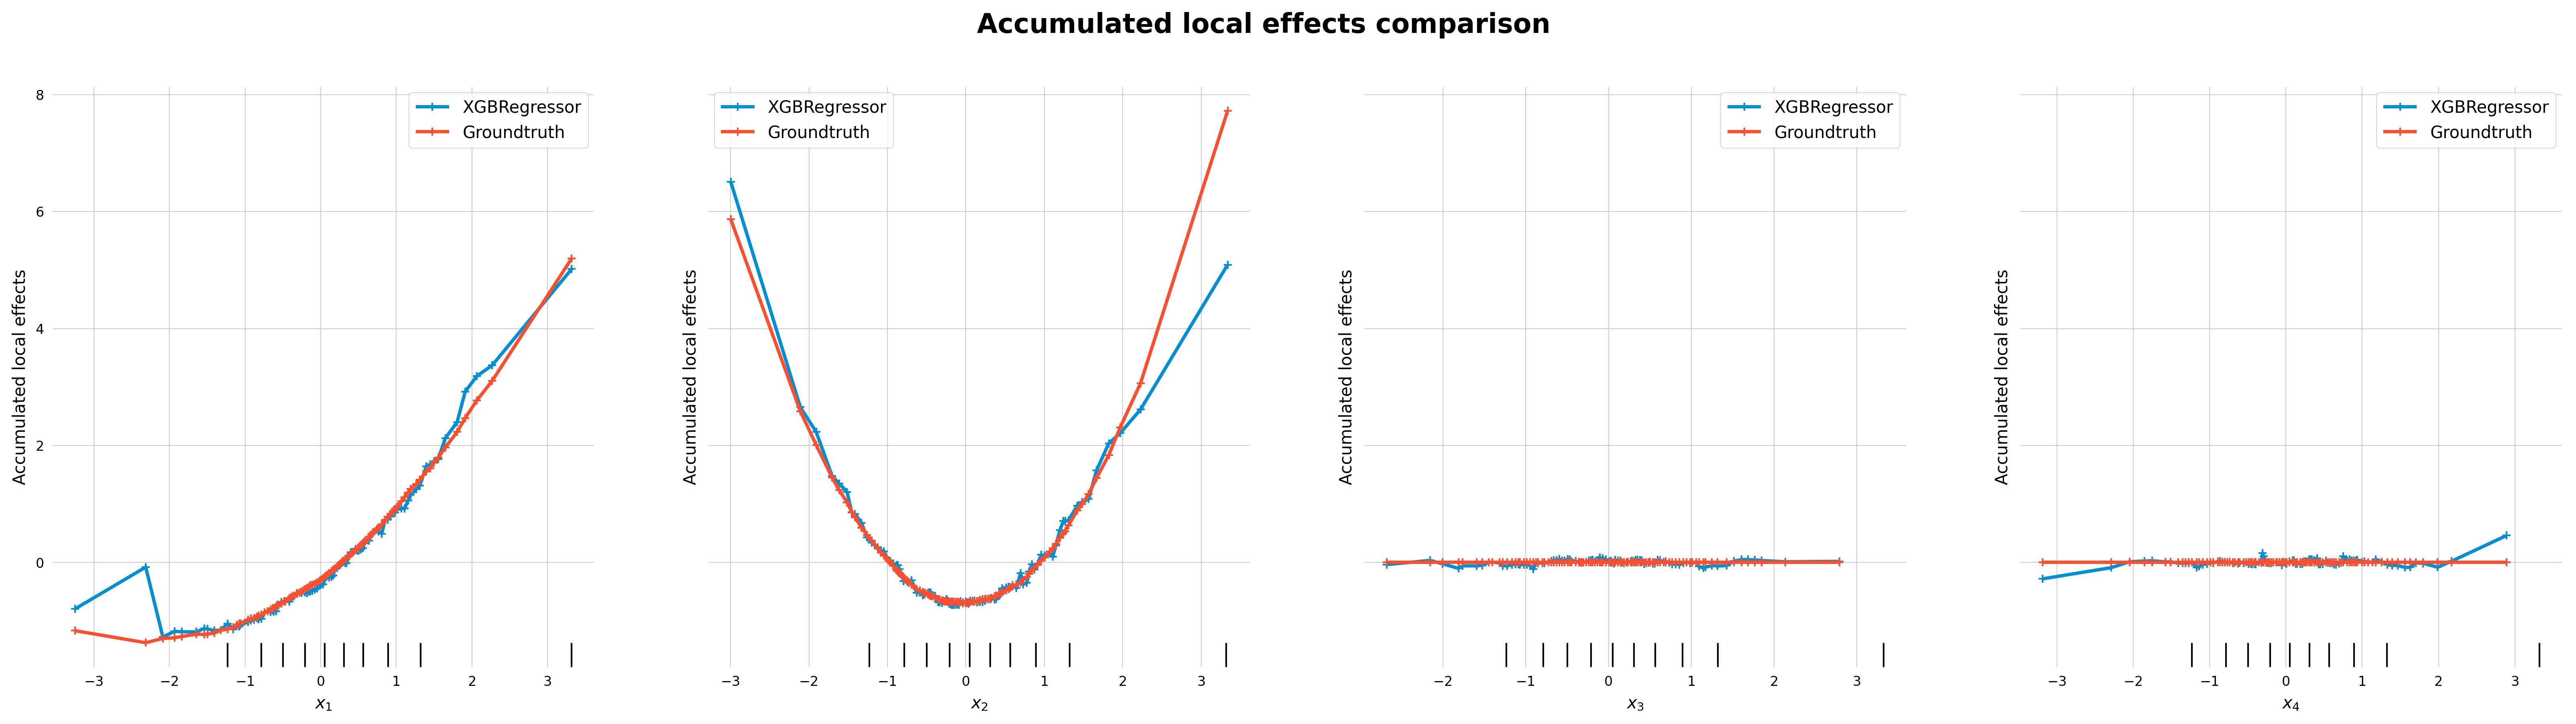

In [20]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

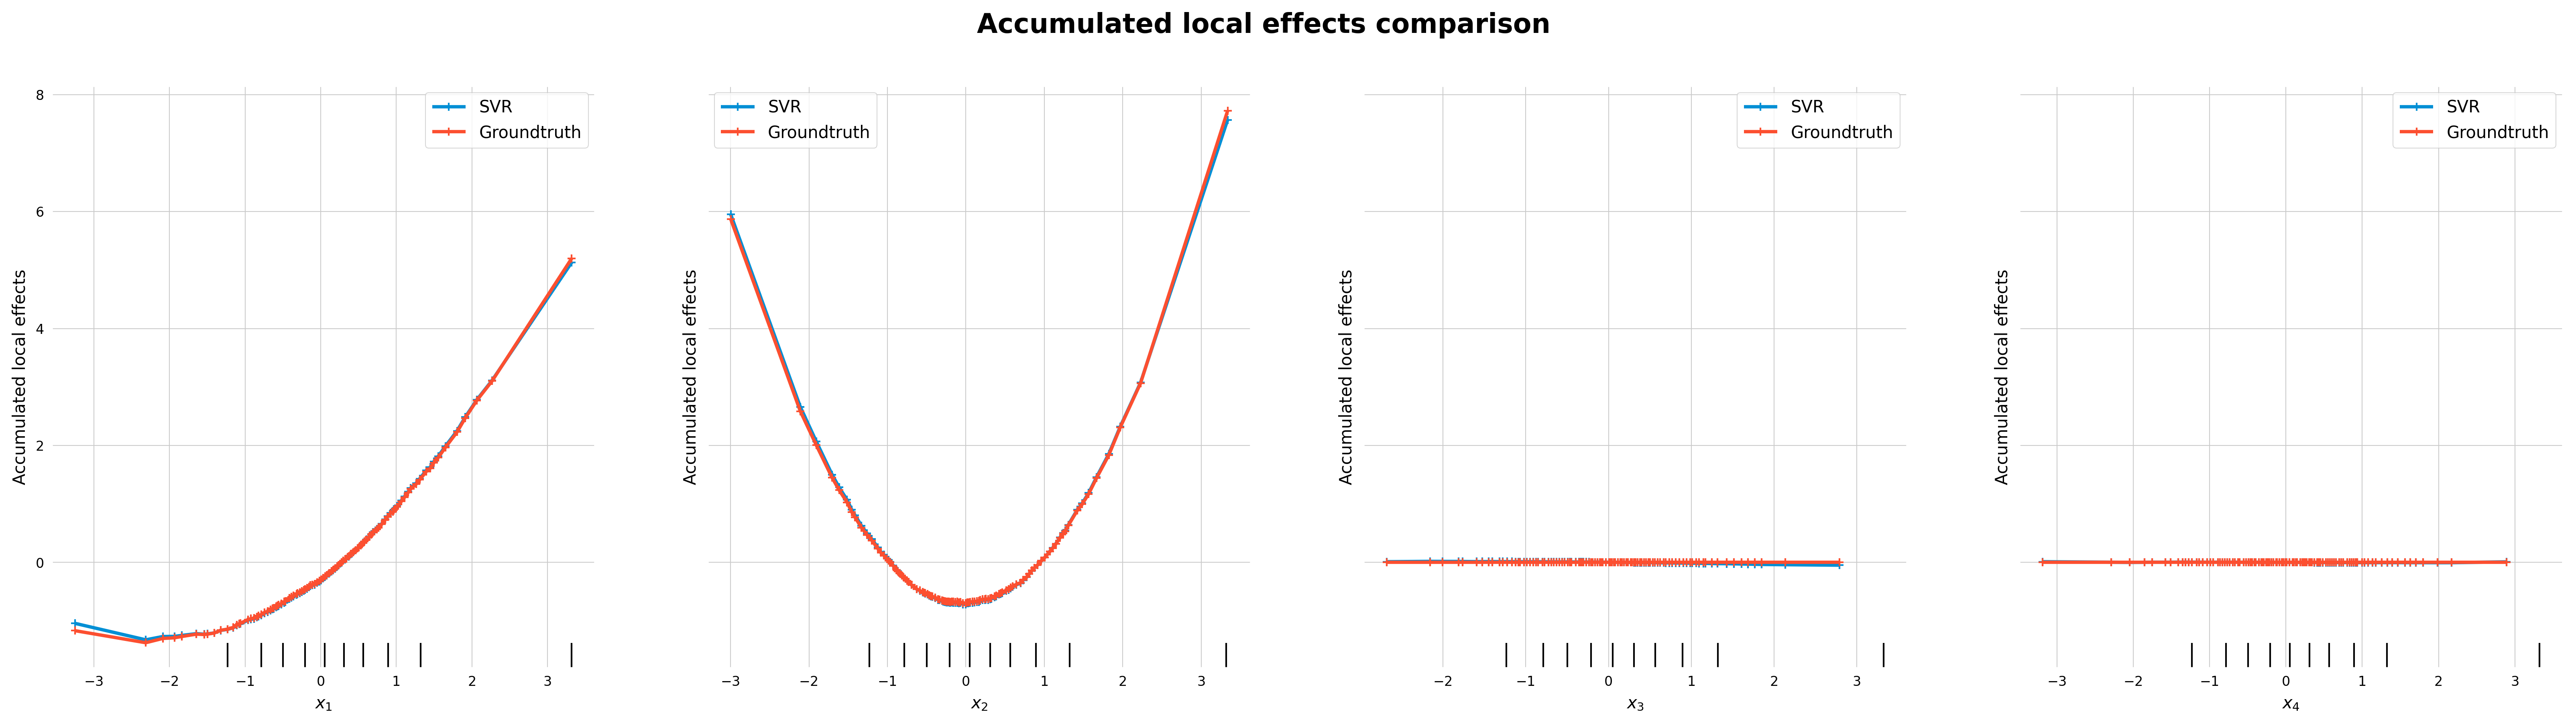

In [21]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);